<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Title" data-toc-modified-id="Title-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Title</a></span><ul class="toc-item"><li><span><a href="#Business-Understanding-and-Business-Problem" data-toc-modified-id="Business-Understanding-and-Business-Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Understanding and Business Problem</a></span><ul class="toc-item"><li><span><a href="#Cost-of-Errors" data-toc-modified-id="Cost-of-Errors-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Cost of Errors</a></span></li></ul></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Initial-Data" data-toc-modified-id="Initial-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Initial Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Exploring-links_df" data-toc-modified-id="Exploring-links_df-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Exploring <code>links_df</code></a></span></li><li><span><a href="#Exploring-movies_df" data-toc-modified-id="Exploring-movies_df-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Exploring <code>movies_df</code></a></span></li><li><span><a href="#Exploring-ratings_df" data-toc-modified-id="Exploring-ratings_df-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Exploring <code>ratings_df</code></a></span></li><li><span><a href="#Exploring-tags_df" data-toc-modified-id="Exploring-tags_df-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Exploring <code>tags_df</code></a></span></li><li><span><a href="#Creating-a-New-DataFrame-with-Relevant-Data" data-toc-modified-id="Creating-a-New-DataFrame-with-Relevant-Data-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Creating a New DataFrame with Relevant Data</a></span><ul class="toc-item"><li><span><a href="#Additional-EDA-that-likely-can-be-dropped-for-final-notebook" data-toc-modified-id="Additional-EDA-that-likely-can-be-dropped-for-final-notebook-1.3.5.1"><span class="toc-item-num">1.3.5.1&nbsp;&nbsp;</span><strong>Additional EDA that likely can be dropped for final notebook</strong></a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#First-Baseline-Model" data-toc-modified-id="First-Baseline-Model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>First Baseline Model</a></span></li><li><span><a href="#Model-KNN-with-Z-Score" data-toc-modified-id="Model-KNN-with-Z-Score-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Model KNN with Z-Score</a></span></li><li><span><a href="#Model-with-SVD" data-toc-modified-id="Model-with-SVD-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Model with SVD</a></span></li></ul></li><li><span><a href="#Creating-a-New-User" data-toc-modified-id="Creating-a-New-User-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating a New User</a></span><ul class="toc-item"><li><span><a href="#Go-back-tomorrow-and-check-output-for-all-functions-to-see-why-it-isnt-saving-to-the-dataframe" data-toc-modified-id="Go-back-tomorrow-and-check-output-for-all-functions-to-see-why-it-isnt-saving-to-the-dataframe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Go back tomorrow and check output for all functions to see why it isnt saving to the dataframe</a></span></li><li><span><a href="#making-predictions-with-surprise" data-toc-modified-id="making-predictions-with-surprise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>making predictions with surprise</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Results/Conclusions" data-toc-modified-id="Results/Conclusions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Results/Conclusions</a></span><ul class="toc-item"><li><span><a href="#Further-Exploration/Questions" data-toc-modified-id="Further-Exploration/Questions-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Further Exploration/Questions</a></span></li></ul></li></ul></li></ul></div>

![header](images/header.png)

# Title

## Business Understanding and Business Problem

### Cost of Errors

## Data Understanding

In [24]:
#imports grabbed from lecture
from random import gauss as gs, uniform as uni, seed

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns, SVD, BaselineOnly
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy



import warnings
warnings.filterwarnings('ignore')

import functions

### Initial Data

In [25]:
#the four csv files provided
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

In [26]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [27]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [30]:
sim_cos = {'name':'msd', 'user_based':False}

## Exploratory Data Analysis

### Exploring `links_df`

In [31]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


This file is a key to merge movie identifiers with IMDB Database and The Movie DataBase. We will be focusing on the MovieLens database for this analysis and will not need this file.

### Exploring `movies_df`

In [32]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies_df.shape

(9742, 3)

In [34]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [35]:
movies_df['title'].nunique()

9737

In [36]:
movies_df['title'].value_counts().head(10)

Confessions of a Dangerous Mind (2002)    2
Saturn 3 (1980)                           2
War of the Worlds (2005)                  2
Eros (2004)                               2
Emma (1996)                               2
Nim's Island (2008)                       1
Little Women (1933)                       1
Pink Floyd: The Wall (1982)               1
Beverly Hillbillies, The (1993)           1
Life with Father (1947)                   1
Name: title, dtype: int64

There are 9737 unique movie titles. Repeats for 5 movies:
- Emma (1996)                                   2
- Saturn 3 (1980)                               2
- Eros (2004)                                   2
- Confessions of a Dangerous Mind (2002)        2
- War of the Worlds (2005)                      2

Cleaning the text in the DataFrame.

In [37]:
movies_df['split_genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.title().split('|'))
movies_df['genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.lower())

This file will be very helpful for our analysis. It provides us with the title of movie in relation to its unique identifier and lets us know the genre categories that the movie would fall under.

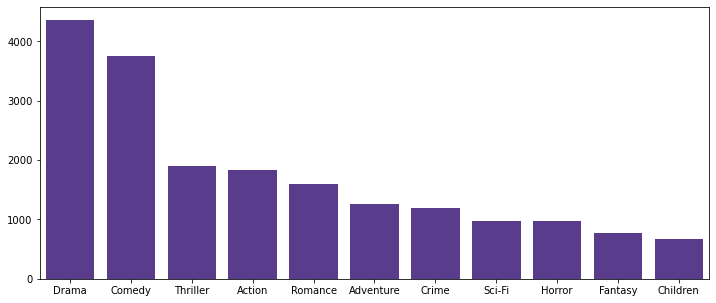

In [38]:
purple = ['#572f99']

genre_counts_names = functions.to_1D(movies_df['split_genres']).value_counts().index.tolist()
genre_counts_values = functions.to_1D(movies_df['split_genres']).value_counts().values


fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=genre_counts_names[:11], y=genre_counts_values[:11], color='#572f99', ax=ax);

In [39]:
genre_counts_names[0].title()

'Drama'

### Exploring `ratings_df`

In [40]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [42]:
# The 10 movies with the most reviews
ratings_df.groupby('movieId').count().sort_values('userId', ascending=False).head(10)

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
260,251,251,251
480,238,238,238
110,237,237,237
589,224,224,224


In [43]:
# the 10 movies with the highest ratings
ratings_df.groupby('movieId').mean().sort_values('rating', ascending=False).head(10)

,userId,rating,timestamp
movieId,,,
88448,483.0,5.0,1.315438e+09
100556,462.0,5.0,1.456151e+09
143031,89.0,5.0,1.520409e+09
143511,105.0,5.0,1.526207e+09
143559,89.0,5.0,1.520410e+09
6201,474.0,5.0,1.100120e+09
102217,63.0,5.0,1.443200e+09
102084,380.0,5.0,1.493422e+09
6192,182.0,5.0,1.063275e+09


In [44]:
# the 10 users with the most reviews
ratings_df.groupby('userId').count().sort_values('rating', ascending=False).head(10)

,movieId,rating,timestamp
userId,,,
414,2698,2698,2698
599,2478,2478,2478
474,2108,2108,2108
448,1864,1864,1864
274,1346,1346,1346
610,1302,1302,1302
68,1260,1260,1260
380,1218,1218,1218
606,1115,1115,1115


This will be the primary datafile for this analysis. It includes relevant information including `userId`, `rating`, and `movieId`. `timestamp` is not relevant for this analysis and will be dropped.

In [45]:
ratings_df.drop('timestamp', axis=1, inplace=True)

### Exploring `tags_df`

In [46]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [47]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [48]:
# users with the most comments on movies
tags_df.groupby('userId').count().sort_values('tag', ascending=False).head(10)

,movieId,tag,timestamp
userId,,,
474,1507,1507,1507
567,432,432,432
62,370,370,370
599,323,323,323
477,280,280,280
424,273,273,273
537,100,100,100
125,48,48,48
357,45,45,45


This will be helpful for analysis as it provides keyword insights to each of the films. `timestamp` will not be helpful for this analysis and will be dropped later.

In [49]:
#cleaning tags
tags_df2 = tags_df
tags_df2['tag_clean'] = tags_df2['tag'].iloc[0:].apply(lambda x: x.title().replace(' ', ''))
tags_df_clean = tags_df2.drop(['tag', 'timestamp'], axis=1)
tags_df_clean.head()

,userId,movieId,tag_clean
0,2,60756,Funny
1,2,60756,HighlyQuotable
2,2,60756,WillFerrell
3,2,89774,BoxingStory
4,2,89774,Mma


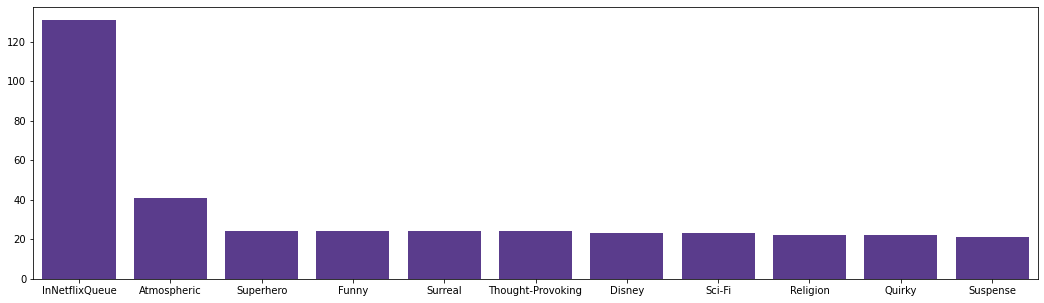

In [50]:
tag_counts_names = tags_df_clean['tag_clean'].value_counts().index
tag_counts_values = tags_df_clean['tag_clean'].value_counts().values

fig, ax = plt.subplots(figsize=(18,5))
# ax.bar(tag_counts_names[:11], tag_counts_values[:11])

sns.barplot(x=tag_counts_names[:11], y=tag_counts_values[:11], color='#572f99', ax=ax);

### Creating a New DataFrame with Relevant Data

In [ ]:
# Merging the ratings data with movie titles and genres
merged_df = ratings_df.merge(movies_df, how='outer', on='movieId')

In [ ]:
merged_df.head()

In [ ]:
# Checking for nulls after merging
merged_df.isna().sum()

In [ ]:
# 18 movies do not have any reviews 
merged_df.tail(20)

In [ ]:
# Dropping nulls in data
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df.shape

In [ ]:
merged_df['movieId'].nunique()

We have a cleaned dataframe with 100836 reviews for 9724 movies.

#### **Additional EDA that likely can be dropped for final notebook**

In [ ]:
# creating a sparse matrix pivot table that has all users as the index and all movies as the columns
pivot_test = merged_df.pivot_table(index='userId', columns='title', values='rating')

In [ ]:
pivot_test.head()

## Modeling

In [ ]:
# Adjusting the dataframe for modeling purposes
model_df = merged_df.drop(['title', 'genres', 'split_genres'], axis=1)

In [ ]:
# Contains all movie ratings and the unique identifiers for user and movie
model_df.head()

In [ ]:
# Converting model_df to surprise accessible data
reader = Reader()
data = Dataset.load_from_df(model_df,reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [ ]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

## First Baseline Model

Setting up a baseline model

In [ ]:
baseline = BaselineOnly()
baseline.fit(trainset)

In [ ]:
base_predictions = baseline.test(testset)

In [ ]:
accuracy.rmse(base_predictions)

## Model KNN with Z-Score

In [ ]:
knn_z = knns.KNNWithZScore(random_state=42)
knn_z.fit(trainset=trainset)

In [ ]:
knn_z_predictions = knn_z.test(testset)

In [ ]:
accuracy.rmse(knn_z_predictions)

## Model with SVD

In [ ]:
svd = SVD(random_state=42)
svd.fit(trainset)

In [ ]:
svd_predictions = svd.test(testset)

In [ ]:
accuracy.rmse(svd_predictions)

# Creating a New User

In [ ]:
merged_df.head()

In [ ]:
new_user_df = merged_df.copy()
new_user_df['username'] = np.nan
new_user_df['password'] = np.nan

In [ ]:
new_user_df.tail()

In [ ]:
test_user = {'userId':611, 
             'movieId':1, 
             'rating':5, 
             'title': 'Toy Story (1995)', 
             'genres': 'Adventure|Animation|Children|Comedy|Fantasy', 
             'username': 'test_user', 
             'password': 'test_user'}

In [ ]:
new_user_df = new_user_df.append(test_user, ignore_index=True)
new_user_df.tail()

In [ ]:
new_user_df = functions.start_program(new_user_df, movies_df, model=baseline)

In [ ]:
new_user_df

## making predictions with surprise

In [ ]:
user_to_rate = 2

In [ ]:
# creating a dataframe with a specified user
user_ratings = new_user_df[new_user_df['userId'] == user_to_rate][['userId', 'movieId', 'rating']]
user_ratings.head()

In [ ]:
user_ratings['movieId'].values

In [ ]:
# creating a dataframe with movies not yet reviewed
user_predict = list(movies_df[~movies_df['movieId'].isin(user_ratings['movieId'].values)].movieId.values)
# user_predict

In [ ]:
predictions = []
for movie in user_predict:
    predictions.append((movies_df['title'].loc[movies_df['movieId'] == movie].values[0], \
                        baseline.predict(user_to_rate, movie)[3]))
    

In [ ]:
predicted_df = pd.DataFrame(predictions, columns=['title', 'prediction'])

In [ ]:
final_prediction = predicted_df.merge(movies_df).drop('movieId', axis=1)

In [ ]:
test = final_prediction.sort_values('prediction', ascending=False)

In [ ]:
print(test[test['genres'].str.contains(('romance').title())])

In [ ]:
test

In [ ]:
predicted_df.sort_values('prediction', ascending=False).head(10)

In [ ]:
predictions

In [ ]:
movies_df['split_genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.lower().split('|'))

movies = []
for i in movies_df['split_genres']:
    for x in i:
        movies.append(x)

In [ ]:
list(set(movies))

In [ ]:
tags_df['tag_clean'] = tags_df['tag'].iloc[0:].apply(lambda x: x.lower().replace(' ', ''))
tags_df['tag_clean'].head()

## Final Model

## Results/Conclusions

### Further Exploration/Questions